# Employee turnover problem

Introduction: 
Loading dataset to see the column names

In [202]:

#Effect of diferent factors for eg:age,gender,traffic,transportation etc. on Employee turnover

import pandas as pd 

#loading data set using pandas 
df = pd.read_csv(r"C:\Users\Wajahat Raza\AppData\Roaming\jupyter\turnover.csv", encoding='ISO-8859-1')
df.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


In [203]:
#Event is our target variable in binary format (event shows if the employee left=1 or Stayed=0)

#Checking if the event(target variable) class is balanced or not
df["event"].value_counts()

1    571
0    558
Name: event, dtype: int64

# Exploratory Data Analysis using matplot

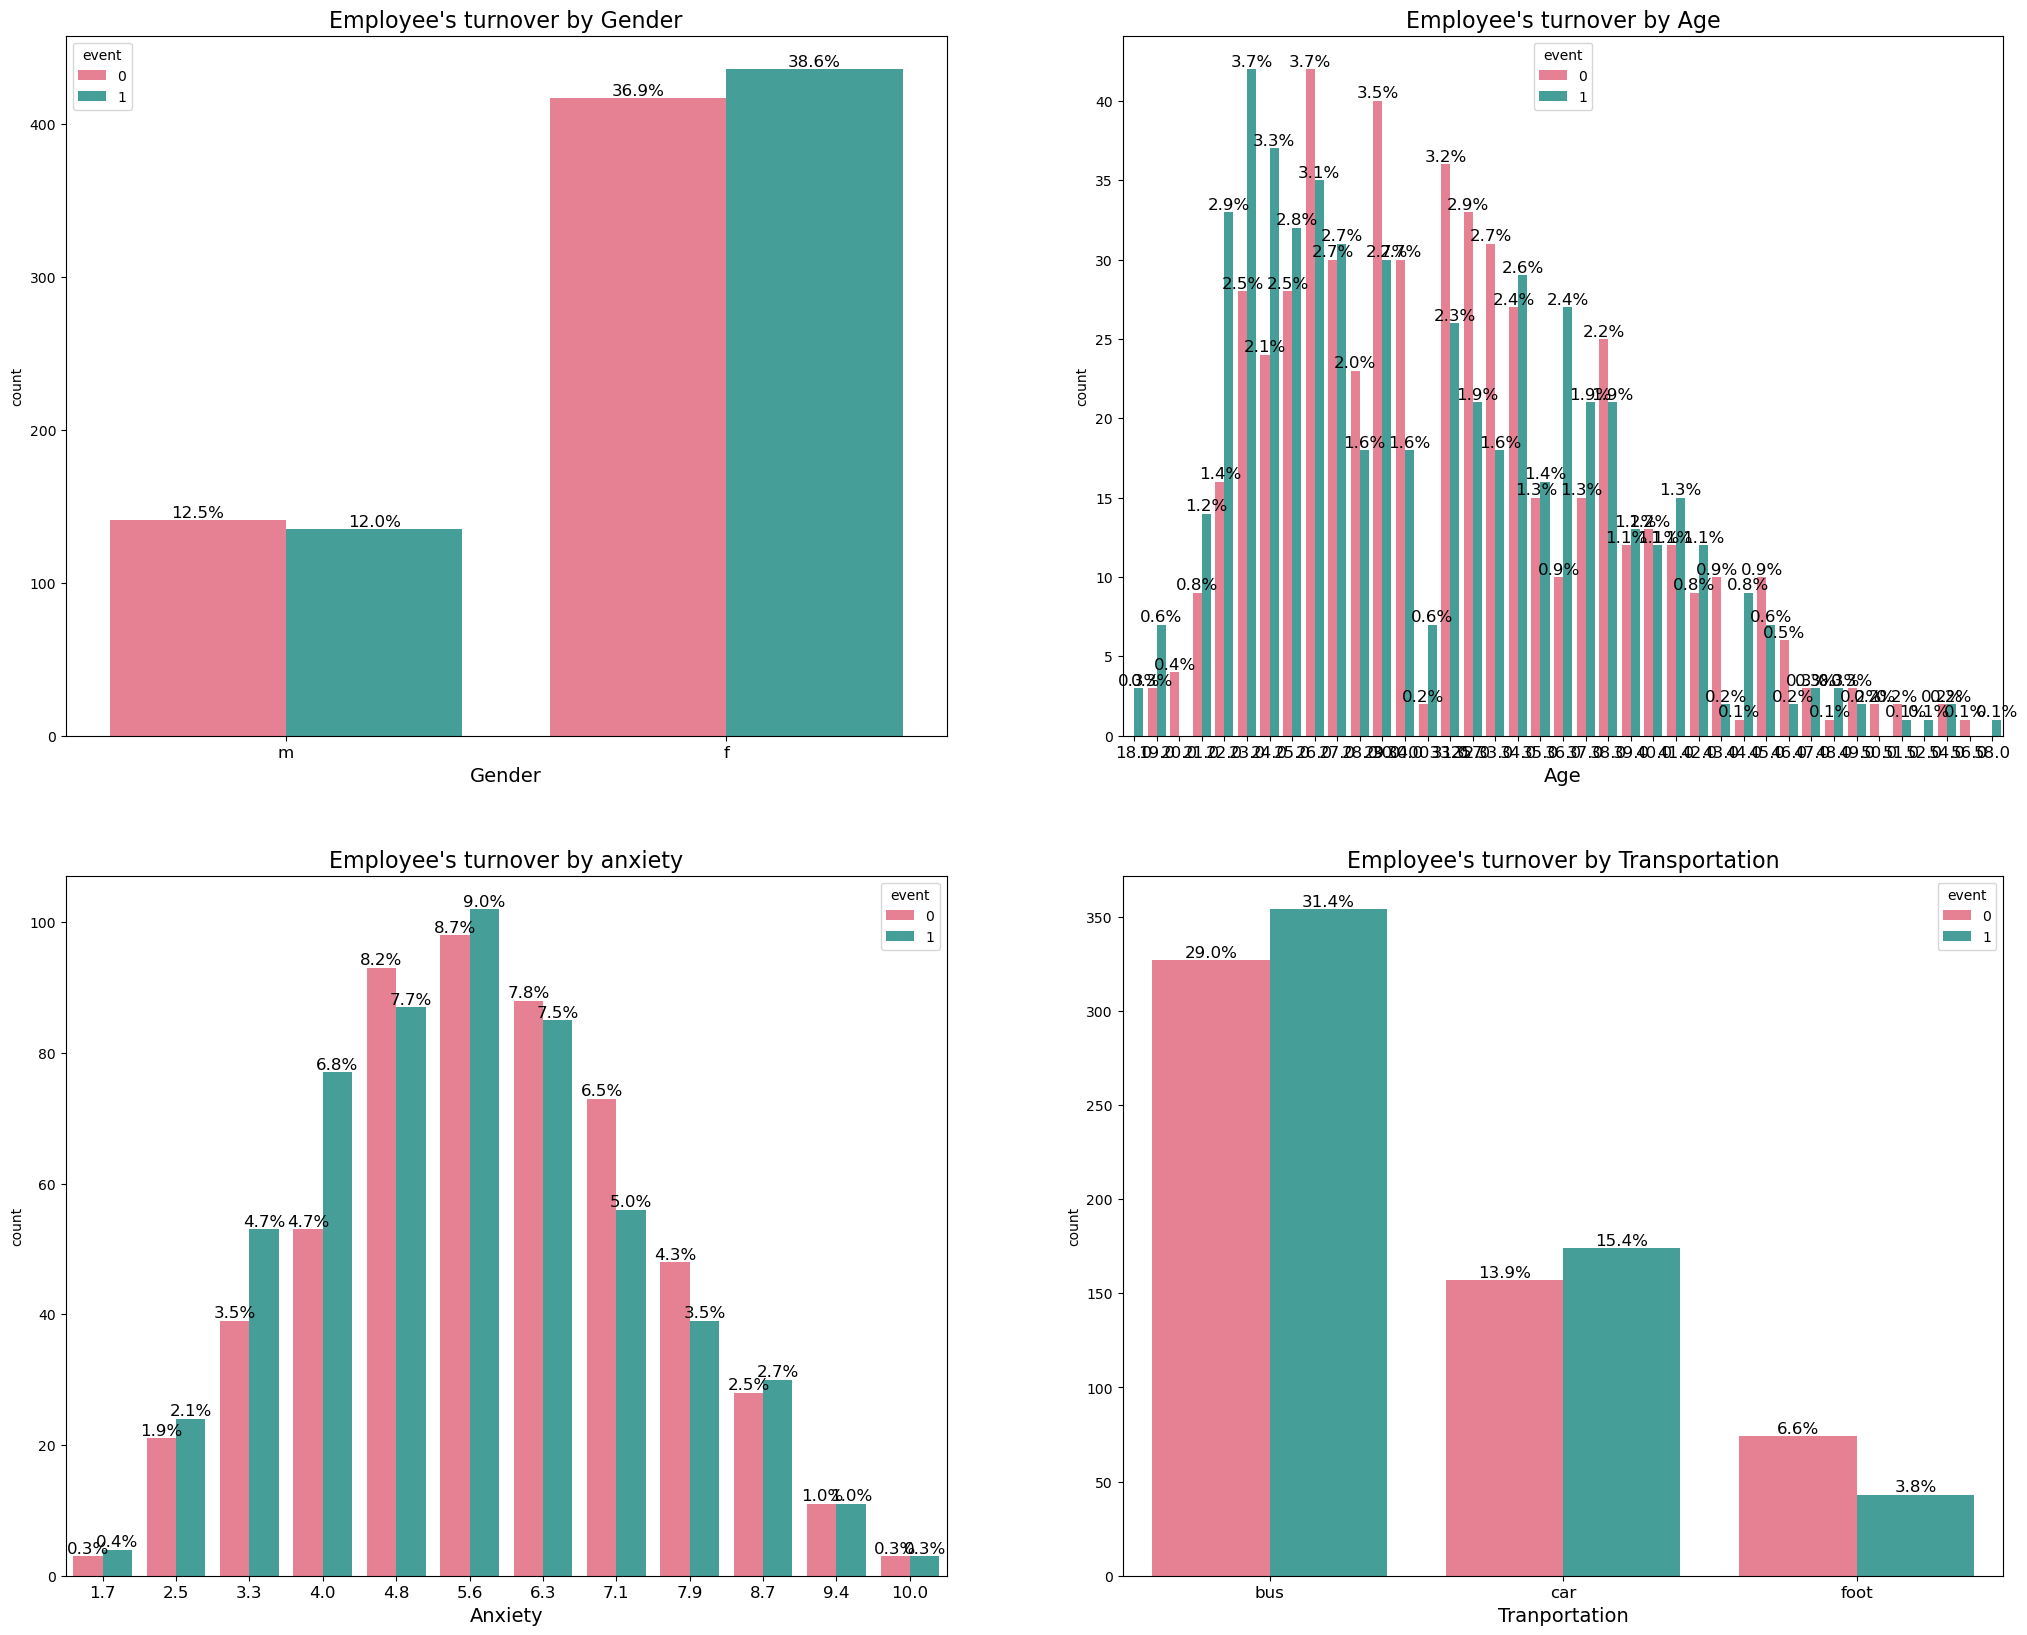

In [204]:
#Visualizing effect of different factors on employee turnover
#Performing Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(25, 20))
sns.countplot(data=df, x='gender', hue='event', palette='husl', ax=axs[0, 0])
sns.countplot(data=df, x='age', hue='event', palette='husl', ax=axs[0, 1])
sns.countplot(data=df, x='anxiety', hue='event', palette='husl', ax=axs[1, 0])
sns.countplot(data=df, x='way', hue='event', palette='husl', ax=axs[1, 1])

# Set the x-axis labels and titles
#Plot to see whether the turnover ratio for females was less than males
axs[0, 0].set_xlabel('Gender', fontsize=14)
axs[0, 0].set_title("Employee's turnover by Gender", fontsize=16)

#Plot to see whether the youngster were more likely to leave than the adults
axs[0, 1].set_xlabel('Age', fontsize=14)
axs[0, 1].set_title("Employee's turnover by Age", fontsize=16)


#Plot to see if the anxious employees are more willing to leave or stay
axs[1, 0].set_xlabel('Anxiety', fontsize=14)
axs[1, 0].set_title("Employee's turnover by anxiety", fontsize=16)


#Plot to see if transport is a factor for employee turnover
axs[1, 1].set_xlabel('Tranportation', fontsize=14)
axs[1, 1].set_title("Employee's turnover by Transportation", fontsize=16)
for ax in axs.flat:
   ax.tick_params(axis='x', labelsize=12)
for ax in axs.flat:
    for p in ax.patches:
        if p.get_height() > 0:
            ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:.1f}%'.format(p.get_height()/len(df)*100), 
                    ha='center', va='bottom', fontsize=12)


plt.show()

In [205]:
#From the first plot we can see that females are more likely to leave than males
#Second plot shows that employee aged between 20-30 years of age are more likely to leave than the employees between 30-40
#Third plot shows that those employees who are more anxious will not switch/leave than the employees who are not
#Fourth plot shows that those who live far and trave by bus on daily basis will resign rather than the ones who can walk or can use car

#assigning 1 to female and 0 to male in order to analyse data easily
if df.gender[0] == 'm' or df.gender[0] == 'f':
    df['gender']=df['gender'].map({'m' : 0, 'f' : 1})

df.head()


,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,0,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,0,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,1,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,1,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,0,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


# Data Pre-Processing

In [206]:
# using more variables therefore used one hot encoding on "way" and "industry" column to get more accurate model 
df["industry"].value_counts()

Retail             289
manufacture        145
IT                 122
Banks              114
etc                 94
Consult             74
State               55
Building            41
PowerGeneration     38
transport           38
Telecom             36
Mining              24
Pharma              20
Agriculture         15
RealEstate          13
 HoReCa             11
Name: industry, dtype: int64

In [207]:
df["way"].value_counts()

bus     681
car     331
foot    117
Name: way, dtype: int64

### Using one hot encoding and label encoding to convert data to int form

In [208]:
categorical_cols = ["way","industry"] 

import pandas as pd
df_new = pd.get_dummies(df,columns=categorical_cols)
df_new


,stag,event,gender,age,profession,traffic,coach,head_gender,greywage,extraversion,...,industry_Mining,industry_Pharma,industry_PowerGeneration,industry_RealEstate,industry_Retail,industry_State,industry_Telecom,industry_etc,industry_manufacture,industry_transport
0,7.030801,1,0,35.0,HR,rabrecNErab,no,f,white,6.2,...,0,0,0,0,0,0,0,0,0,0
1,22.965092,1,0,33.0,HR,empjs,no,m,white,6.2,...,0,0,0,0,0,0,0,0,0,0
2,15.934292,1,1,35.0,HR,rabrecNErab,no,m,white,6.2,...,0,0,1,0,0,0,0,0,0,0
3,15.934292,1,1,35.0,HR,rabrecNErab,no,m,white,5.4,...,0,0,1,0,0,0,0,0,0,0
4,8.410678,1,0,32.0,Commercial,youjs,yes,f,white,3.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,10.611910,0,1,41.0,HR,rabrecNErab,my head,m,white,8.6,...,0,0,0,0,0,0,0,0,0,0
1125,10.611910,0,1,41.0,HR,rabrecNErab,my head,m,white,8.6,...,0,0,0,0,0,0,0,0,0,0
1126,118.800821,0,1,34.0,Accounting,KA,no,f,white,4.6,...,0,0,0,0,0,0,1,0,0,0
1127,49.412731,0,1,51.0,HR,empjs,no,m,grey,3.8,...,0,0,0,0,0,0,0,0,0,0


In [209]:
#Got poor accuracy therefore used more columns/features to train model using label encoder in order to not increase the columns 
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df_new["profession"]=label_encoder.fit_transform(df_new["profession"])
df_new["traffic"]=label_encoder.fit_transform(df_new["traffic"])
df_new["coach"]=label_encoder.fit_transform(df_new["coach"])
df_new["head_gender"]=label_encoder.fit_transform(df_new["head_gender"])
df_new["greywage"]=label_encoder.fit_transform(df_new["greywage"])
df_new.head()

,stag,event,gender,age,profession,traffic,coach,head_gender,greywage,extraversion,...,industry_Mining,industry_Pharma,industry_PowerGeneration,industry_RealEstate,industry_Retail,industry_State,industry_Telecom,industry_etc,industry_manufacture,industry_transport
0,7.030801,1,0,35.0,6,4,1,0,1,6.2,...,0,0,0,0,0,0,0,0,0,0
1,22.965092,1,0,33.0,6,2,1,1,1,6.2,...,0,0,0,0,0,0,0,0,0,0
2,15.934292,1,1,35.0,6,4,1,1,1,6.2,...,0,0,1,0,0,0,0,0,0,0
3,15.934292,1,1,35.0,6,4,1,1,1,5.4,...,0,0,1,0,0,0,0,0,0,0
4,8.410678,1,0,32.0,2,7,2,0,1,3.0,...,0,0,0,0,1,0,0,0,0,0


In [210]:
#dropping rest of the columns that I will not be using
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import numpy as np
import pandas as pd

df=df_new.drop(["extraversion","independ","selfcontrol","novator"],axis=1)
df.head()


,stag,event,gender,age,profession,traffic,coach,head_gender,greywage,anxiety,...,industry_Mining,industry_Pharma,industry_PowerGeneration,industry_RealEstate,industry_Retail,industry_State,industry_Telecom,industry_etc,industry_manufacture,industry_transport
0,7.030801,1,0,35.0,6,4,1,0,1,7.1,...,0,0,0,0,0,0,0,0,0,0
1,22.965092,1,0,33.0,6,2,1,1,1,7.1,...,0,0,0,0,0,0,0,0,0,0
2,15.934292,1,1,35.0,6,4,1,1,1,4.8,...,0,0,1,0,0,0,0,0,0,0
3,15.934292,1,1,35.0,6,4,1,1,1,2.5,...,0,0,1,0,0,0,0,0,0,0
4,8.410678,1,0,32.0,2,7,2,0,1,7.1,...,0,0,0,0,1,0,0,0,0,0


### Checking for missing values in columns

In [211]:
Features = df.columns.tolist() # Make a list of the feature names and checking for null/missing values
print(Features)

# Go through each input feature checking if there are any (and how many) NaNs 
for feature in Features:
    count = 0
    for i in range(0,len(df)):
        if pd.isnull(df.iloc[i][feature]) == True:
            count = count + 1
    print('Null values for', feature ,'is', count)

['stag', 'event', 'gender', 'age', 'profession', 'traffic', 'coach', 'head_gender', 'greywage', 'anxiety', 'way_bus', 'way_car', 'way_foot', 'industry_ HoReCa', 'industry_Agriculture', 'industry_Banks', 'industry_Building', 'industry_Consult', 'industry_IT', 'industry_Mining', 'industry_Pharma', 'industry_PowerGeneration', 'industry_RealEstate', 'industry_Retail', 'industry_State', 'industry_Telecom', 'industry_etc', 'industry_manufacture', 'industry_transport']
Null values for stag is 0
Null values for event is 0
Null values for gender is 0
Null values for age is 0
Null values for profession is 0
Null values for traffic is 0
Null values for coach is 0
Null values for head_gender is 0
Null values for greywage is 0
Null values for anxiety is 0
Null values for way_bus is 0
Null values for way_car is 0
Null values for way_foot is 0
Null values for industry_ HoReCa is 0
Null values for industry_Agriculture is 0
Null values for industry_Banks is 0
Null values for industry_Building is 0
Null

In [212]:
X=df.drop(['event'],axis=1) # Input variables
X_names = Features # Remove 'event' from feature names
y=df['event'] # Target variable
y_names=['Stayed','Left'] # Target labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0, stratify=y)  
X_train.shape, X_test.shape

((677, 28), (452, 28))

### Checking if all features are ready to use by verifying their numerical form

In [213]:

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

[]

In [214]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['stag',
 'gender',
 'age',
 'profession',
 'traffic',
 'coach',
 'head_gender',
 'greywage',
 'anxiety',
 'way_bus',
 'way_car',
 'way_foot',
 'industry_ HoReCa',
 'industry_Agriculture',
 'industry_Banks',
 'industry_Building',
 'industry_Consult',
 'industry_IT',
 'industry_Mining',
 'industry_Pharma',
 'industry_PowerGeneration',
 'industry_RealEstate',
 'industry_Retail',
 'industry_State',
 'industry_Telecom',
 'industry_etc',
 'industry_manufacture',
 'industry_transport']

In [215]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()


Series([], dtype: float64)

In [216]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

### Detecting Outliers using Z-score method 

In [217]:
#Z-score method to remove outliers when I got poor accuracy around 65
import numpy as np

# Calculate the mean and standard deviation for each variable
mean_experience = df['stag'].mean()
std_experience = df['stag'].std()

mean_age = df['age'].mean()
std_age = df['age'].std()
# Calculate the Z-scores for all data points

z_scores_experience = np.abs((df['stag'] - mean_experience) / std_experience)
z_scores_age = np.abs((df['age'] - mean_age) / std_age)

# Set threshold for detecting outliers 

outliers_experience = df[z_scores_experience > 3.5]
outliers_age = df[z_scores_age > 3.5]


# Print the results 

print(outliers_experience['stag'])
print(outliers_age['age'])

197    166.275154
254    160.065708
366    164.566735
568    163.811088
641    179.449692
674    163.778234
675    163.778234
960    166.078029
Name: stag, dtype: float64
638    56.0
741    58.0
Name: age, dtype: float64


### Removing outliers from the variables

In [218]:
import numpy as np
median_stag=df.loc[df['stag']>56, 'stag'].median()
median_age = df.loc[df['age']>160, 'age'].median()
df["stag"] = np.where(df["stag"] >56, median_stag,df['stag'])
df["age"]=np.where(df["age"]>160,median_age,df["age"])

### Now training the outlier free data again

In [219]:

X=df.drop(['event'],axis=1) # Input variables
X_names = Features # Remove 'event' from feature names
y=df['event'] # Target variable
y_names=['Stayed','Left'] # Target labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify=y)  
X_train.shape, X_test.shape

((756, 28), (373, 28))

# Using Decision Tree Classifier

Training accuracy for max_depth=0.5: 0.5052910052910053
Test accuracy for max_depth=0.5: 0.5067024128686327
Training accuracy for max_depth=1: 0.5462962962962963
Test accuracy for max_depth=1: 0.5683646112600537
Training accuracy for max_depth=2: 0.5886243386243386
Test accuracy for max_depth=2: 0.5281501340482574
Training accuracy for max_depth=3: 0.6097883597883598
Test accuracy for max_depth=3: 0.5093833780160858
Training accuracy for max_depth=4: 0.6428571428571429
Test accuracy for max_depth=4: 0.5603217158176944
Training accuracy for max_depth=5: 0.7129629629629629
Test accuracy for max_depth=5: 0.5522788203753352
Training accuracy for max_depth=6: 0.7566137566137566
Test accuracy for max_depth=6: 0.5683646112600537
Training accuracy for max_depth=7: 0.7923280423280423
Test accuracy for max_depth=7: 0.5683646112600537
Training accuracy for max_depth=8: 0.8174603174603174
Test accuracy for max_depth=8: 0.5844504021447721
Training accuracy for max_depth=9: 0.8571428571428571
Test a

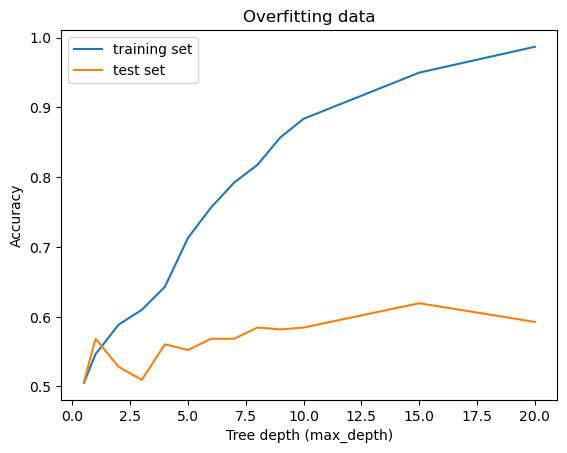

In [220]:
#Using decision tree classifier visualising accuracy on different tree depths

tree_depth_vals = [0.5,1,2,3,4,5,6,7,8,9,10,15,20]
accuracy_training_set=[]
accuracy_test_set=[]
for i in range(0,len(tree_depth_vals)):
    DT = tree.DecisionTreeClassifier(max_depth=tree_depth_vals[i], random_state=i)
    DT.fit(X_train,y_train)
    # Training set
    y_training_prediction = DT.predict(X_train)
    accuracytrain = metrics.accuracy_score(y_train, y_training_prediction)
    accuracy_training_set.append(accuracytrain)
    print(f"Training accuracy for max_depth={max_depth_vals[i]}: {accuracytrain}")
    # Test set
    y_test_prediction = DT.predict(X_test)
    accuracytest = metrics.accuracy_score(y_test, y_test_prediction)
    accuracy_test_set.append(accuracytest)
    print(f"Test accuracy for max_depth={max_depth_vals[i]}: {accuracytest}")

# Plot accuracy of train and test set as a function of max_depth 
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
Training_line, = ax.plot(tree_depth_vals,accuracy_training_set,label='training set')
Test_line, = ax.plot(tree_depth_vals,accuracy_test_set,label='test set')
plt.legend(handles=[Training_line, Test_line])
plt.title("Overfitting data")
plt.xlabel("Tree depth (max_depth)")
plt.ylabel("Accuracy")
plt.show()

In [221]:
#As we can see the accuracy is still not improving and model is showing overfitting since training data set has high accuracy value and test data has low value
from sklearn.model_selection import cross_val_score
import math
max_depth = 2
k=5

#CV scores using decision tree classifier
DT = tree.DecisionTreeClassifier(max_depth=max_depth, random_state=3)
CvScores = cross_val_score(DT, X, y, cv=k)
print('Cross-validation scores are:',cv_scores)

# Compute the average of the accuracies and its error
avg = sum(CvScores)/len(CvScores)
sd = math.sqrt(sum((CvScores-avg)**2)/(len(CvScores)-1))
print('Average performance for a tree depth of',max_depth,'is:',np.round(avg*100,1),'+/-',np.round(sd*100,1),'%')

Cross-validation scores are: [0.825 0.815 0.82  0.825 0.8  ]
Average performance for a tree depth of 2 is: 53.0 +/- 5.8 %


# Random Forest Classifier

In [222]:
#Cross Validation scores are good but can be improved, therefore using another classifier i.e. random forest(using 10 trees) 
from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)

# Predict the Train set results

ytrain_predict=rfc.predict(X_train)

# Predict the Test set results


ytest_predict = rfc.predict(X_test)


accuracy_on_train_data = metrics.accuracy_score(y_train, ytrain_predict)
    
accuracy_on_test_data = metrics.accuracy_score(y_test, ytest_predict)
print("Accuracy obtained on training data set:{0:0.4f}".format(accuracy_on_train_data))
print("Accuracy obtained on test data set:{0:0.4f}".format(accuracy_on_test_data))

Accuracy obtained on training data set:1.0000
Accuracy obtained on test data set:0.6247


In [223]:
from sklearn.metrics import accuracy_score

print('Model accuracy using ten number(10) of decision trees : {0:0.4f}'. format(accuracy_score(y_test, ytest_predict)))

Model accuracy using ten number(10) of decision trees : 0.6247


In [224]:
#Using 100 trees to check accuracy
randomforestclf_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

randomforestclf_100.fit(X_train, y_train)



# Predict on the test set results

ypredict_100 = randomforestclf_100.predict(X_test)



# Check accuracy score 
print('Model accuracy using 100 decision-trees is : {0:0.4f}'. format(accuracy_score(y_test, ypredict_100)))








Model accuracy using 100 decision-trees is : 0.6247


In [225]:
#Even 100 trees did not show any improvement, using bootstrapping and checking for out of bag error

from sklearn.ensemble import RandomForestClassifier
Randomforestclf = RandomForestClassifier(n_estimators=100,bootstrap=True,max_features='auto',criterion='gini',max_depth=10,random_state=3,oob_score=True)
Randomforestclf.fit(X_train,y_train)
ytrain_predict = Randomforestclf.predict(X_train)
print("Accuracy on training set:",round(metrics.accuracy_score(y_train, ytrain_predict),2))
ytest_predict = Randomforestclf.predict(X_test)
print("Accuracy on test set:",round(metrics.accuracy_score(y_test, ytest_predict),2))
print("Out Of Bag score:",round(Randomforestclf.oob_score_,2))


Accuracy on training set: 0.97
Accuracy on test set: 0.6
Out Of Bag score: 0.67


In [226]:
#using cross validation to check score

from sklearn.model_selection import cross_val_score
import math
from sklearn.ensemble import RandomForestClassifier

Randomforestclf = RandomForestClassifier(n_estimators=100,bootstrap=True,max_features="auto",criterion='gini',max_depth=10,random_state=3,oob_score=False)
cv_scores = cross_val_score(Randomforestclf, X, y, cv=12)


cv_scores
avg_score = sum(cv_scores)/len(cv_scores)
avg_score

0.6200167973124301

# Recursive Feature Elimination

In [227]:
#difference between oob and cv scores show high variance, hence model is overfitted therefore using hyperparameter tuning using RFE

#using RFE that recursively removes features from the dataset and fits a model on the remaining features 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# generate a random classification dataset
X, y = make_classification(n_samples=1000, n_features=30, n_informative=10, n_redundant=10, random_state=1)

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# define a model "random forest classifier"
model = RandomForestClassifier()

#  Encorporating random forest classifier in RFE and selecting features
rfe = RFE(estimator=model, n_features_to_select=30)

# fit the RFE instance on the training data
rfe.fit(X_train, y_train)

# get the selected features
selected_features = X_train[:, rfe.support_]

# train a new random forest classifier using only the selected features
model.fit(selected_features, y_train)

# Check the performance of the new model on test dataset
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
print(f"Accuracy: {score}")

Accuracy: 0.9181818181818182


# Features Importance

### Yielding best features to train data and achieve higher accuracy

In [228]:

# create an instance of RFE and pass the random forest classifier and the number of features to select
rfe = RFE(estimator=model, n_features_to_select=10)

# fit the RFE instance on the training data
rfe.fit(X_train, y_train)

# get the ranking of the features
feature_ranking = rfe.ranking_

# print the importance of each feature
for i in range(len(feature_ranking)):
    print(f"Feature {i+1}: Rank {feature_ranking[i]}")

Feature 1: Rank 1
Feature 2: Rank 10
Feature 3: Rank 1
Feature 4: Rank 12
Feature 5: Rank 8
Feature 6: Rank 6
Feature 7: Rank 21
Feature 8: Rank 3
Feature 9: Rank 7
Feature 10: Rank 14
Feature 11: Rank 1
Feature 12: Rank 1
Feature 13: Rank 20
Feature 14: Rank 1
Feature 15: Rank 11
Feature 16: Rank 1
Feature 17: Rank 1
Feature 18: Rank 2
Feature 19: Rank 16
Feature 20: Rank 17
Feature 21: Rank 5
Feature 22: Rank 19
Feature 23: Rank 1
Feature 24: Rank 1
Feature 25: Rank 15
Feature 26: Rank 9
Feature 27: Rank 18
Feature 28: Rank 1
Feature 29: Rank 13
Feature 30: Rank 4


In [229]:
from sklearn.feature_selection import RFE
estimator = RandomForestClassifier()
rfe = RFE(estimator, n_features_to_select=10, verbose=1)
rfe.fit(X_train, y_train)
rfe.support_
rfe.ranking_
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


# Improved Accuracy

In [230]:
#using Random forest classifier model with only the important features given by RFE
X_train_selected = X_train[:, rfe.support_]
X_test_selected = X_test[:, rfe.support_]

model = RandomForestClassifier()
model.fit(X_train_selected, y_train)
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.906060606060606


# Logistic Regression and Grid search cross validation

In [231]:
#Using another model i.e. Logisitic Regression to see if any improvement could be done
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# define the logistic regression model
logreg = LogisticRegression()

# define the hyperparameter grid to search over
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5)

# fit the grid search to the data
grid_search.fit(X, y)

# print the best hyperparameters and the corresponding mean cross-validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 0.1}
Best cross-validation score:  0.899


In [232]:
# obtain the best hyperparameters
best_params = grid_search.best_params_
logreg = LogisticRegression()
# re-fit the model on the entire training set with the best hyperparameters
logreg.set_params(**best_params)
logreg.fit(X, y)





LogisticRegression(C=0.1)

In [233]:
y_pred = logreg.predict(X_test)

# calculate the accuracy of the model on new data
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model on new data: ", accuracy)

Accuracy of the model on new data:  0.9090909090909091


### So the Random forest classifier gave the better accuracy after using RFE 

# Confusion Matrix to validate model's performance

In [237]:
#To evaluate model performance using confusion matrix
from sklearn.metrics import confusion_matrix
X_train_selected = X_train[:, rfe.support_]
X_test_selected = X_test[:, rfe.support_]
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[146  20]
 [ 11 153]]


In [240]:
model = RandomForestClassifier()
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)

[[144  22]
 [ 11 153]]


In [238]:
#Getting F1 score to see logisitic regression model performance
precision = cm[0,0] / (cm[0,0] + cm[1,0])
print('Precision:', precision)
recall = cm[0,0] / (cm[0,0] + cm[0,1])
print('Recall:', recall)
f1_score = 2 * (precision * recall) / (precision + recall)
print('F1 score:', f1_score)

Precision: 0.9299363057324841
Recall: 0.8795180722891566
F1 score: 0.9040247678018575


In [241]:
#Getting F1 score to see Random forest model performance
precision = cm1[0,0] / (cm1[0,0] + cm1[1,0])
print('Precision:', precision)
recall = cm1[0,0] / (cm1[0,0] + cm1[0,1])
print('Recall:', recall)
f1_score = 2 * (precision * recall) / (precision + recall)
print('F1 score:', f1_score)

Precision: 0.9290322580645162
Recall: 0.8674698795180723
F1 score: 0.8971962616822431


# Visualising Mean Accuracy using more number of trees in RF classifier

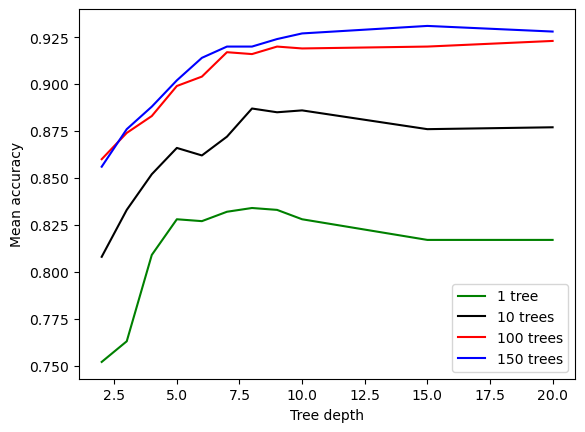

In [201]:
#Good F1 score achieved along with good accuracy


#Plotting Mean accuracy on different trees depth using random forest since we achieved highest accuracy using RF classifier

from sklearn.model_selection import cross_val_score
import math
from sklearn.ensemble import RandomForestClassifier
tree_depth_vals = [2,3,4,5,6,7,8,9,10,15,20]
n_estimators_vals = [10,100,150]
mean_accuracy = []
std_accuracy = []
k=5
for i, num in enumerate(n_estimators_vals):
    mean_accuracy_cv = []
    std_cv = []
    for val in tree_depth_vals:
        randomforestclf = RandomForestClassifier(n_estimators=num,bootstrap=True,max_features="auto",criterion='gini',max_depth=val,random_state=i,oob_score=False)
        cv_scores = cross_val_score(randomforestclf, X, y, cv=k)
        avg = sum(cv_scores)/len(cv_scores)
        std = math.sqrt(sum((cv_scores-avg)**2)/(len(cv_scores)-1))
        mean_accuracy_cv.append(avg)
        std_cv.append(std)
    mean_accuracy.append(mean_accuracy_cv)
    std_accuracy.append(std_cv)

fig = plt.figure()
ax = plt.axes()
L_10, = ax.plot(tree_depth_vals,mean_accuracy[0],color='black',label='10 trees')
L_100, = ax.plot(tree_depth_vals,mean_accuracy[1],color='red',label='100 trees')
L_150, = ax.plot(tree_depth_vals,mean_accuracy[2],color='blue',label='150 trees')

# Now find accuracy scores as a function of tree depth for a single decision tree
mean_accuracy_cv = []
for i in range(0,len(tree_depth_vals)):
    DT = tree.DecisionTreeClassifier(max_depth=tree_depth_vals[i], random_state=3)
    cv_scores = cross_val_score(DT, X, y, cv=k)
    avg = sum(cv_scores)/len(cv_scores)
    mean_accuracy_cv.append(avg)
    
L_1, = ax.plot(tree_depth_vals,mean_accuracy_cv,color='green',label='1 tree')


plt.legend(handles=[L_1, L_10, L_100, L_150])
plt.xlabel("Tree depth")
plt.ylabel("Mean accuracy")
plt.show()

## We can see that as we keep on increasing the tree depth the accuracy increases, hence model can predict employee turnover

# References

### https://www.kaggle.com/datasets/davinwijaya/employee-turnover
### https://www.kaggle.com/code/mohamedchahed/employees-turnover-analysis/notebook
### https://www.kaggle.com/code/prashant111/random-forest-classifier-feature-importance
